In [50]:
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
import seaborn as sns
from pandas.plotting import andrews_curves, parallel_coordinates
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
import warnings

warnings.filterwarnings('ignore')

In [51]:
dataset = pd.read_csv('Toxins5.csv')

In [52]:
dataset.shape

(137, 5)

In [53]:
dataset.head(5)

,TN,Chlorophyla,TDI,TTC,Toxicity
0,0.57,0.62,0.42,0.00,low
1,0.18,5.91,1.05,0.01,low
2,0.21,5.33,0.39,0.02,low
3,1.07,6.71,1.00,0.67,middle
4,0.36,2.59,1.07,0.18,middle


In [54]:
dataset.describe()

,TN,Chlorophyla,TDI,TTC
count,137.000000,137.000000,137.000000,137.000000
mean,0.941022,39.032774,0.780657,1.351095
std,0.800613,72.623651,0.394969,2.849098
min,0.070000,0.480000,0.000000,0.000000
25%,0.410000,5.330000,0.530000,0.030000
50%,0.730000,16.440000,0.880000,0.190000
75%,1.160000,50.480000,1.060000,0.900000
max,4.570000,690.160000,1.440000,17.190000


In [55]:
dataset.groupby('Toxicity').size()

Toxicity
high      34
low       57
middle    46
dtype: int64

In [56]:
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values

In [57]:
le = LabelEncoder()
y = le.fit_transform(y)

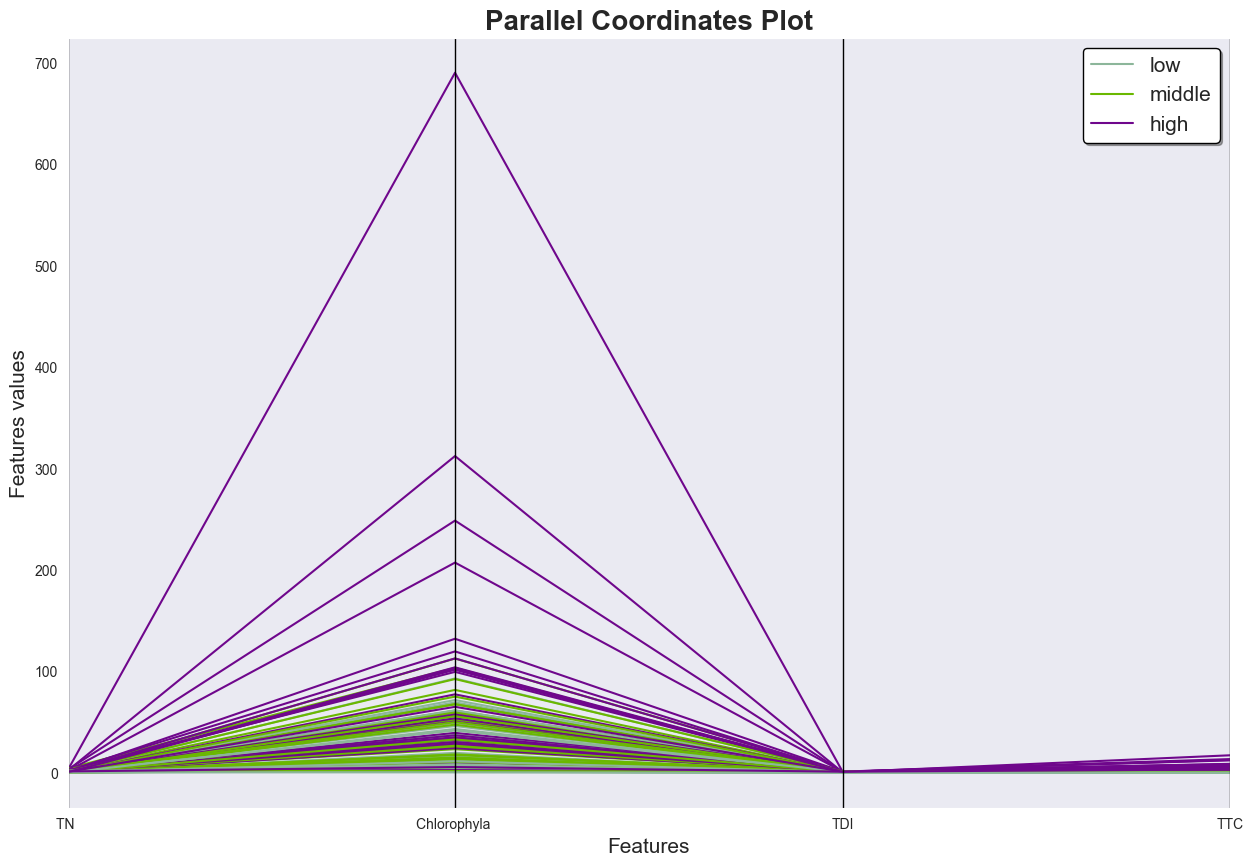

In [58]:
plt.figure(figsize=(15, 10))
parallel_coordinates(dataset, 'Toxicity')
plt.title('Parallel Coordinates Plot', fontsize=20, fontweight='bold')
plt.xlabel('Features', fontsize=15)
plt.ylabel('Features values', fontsize=15)
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

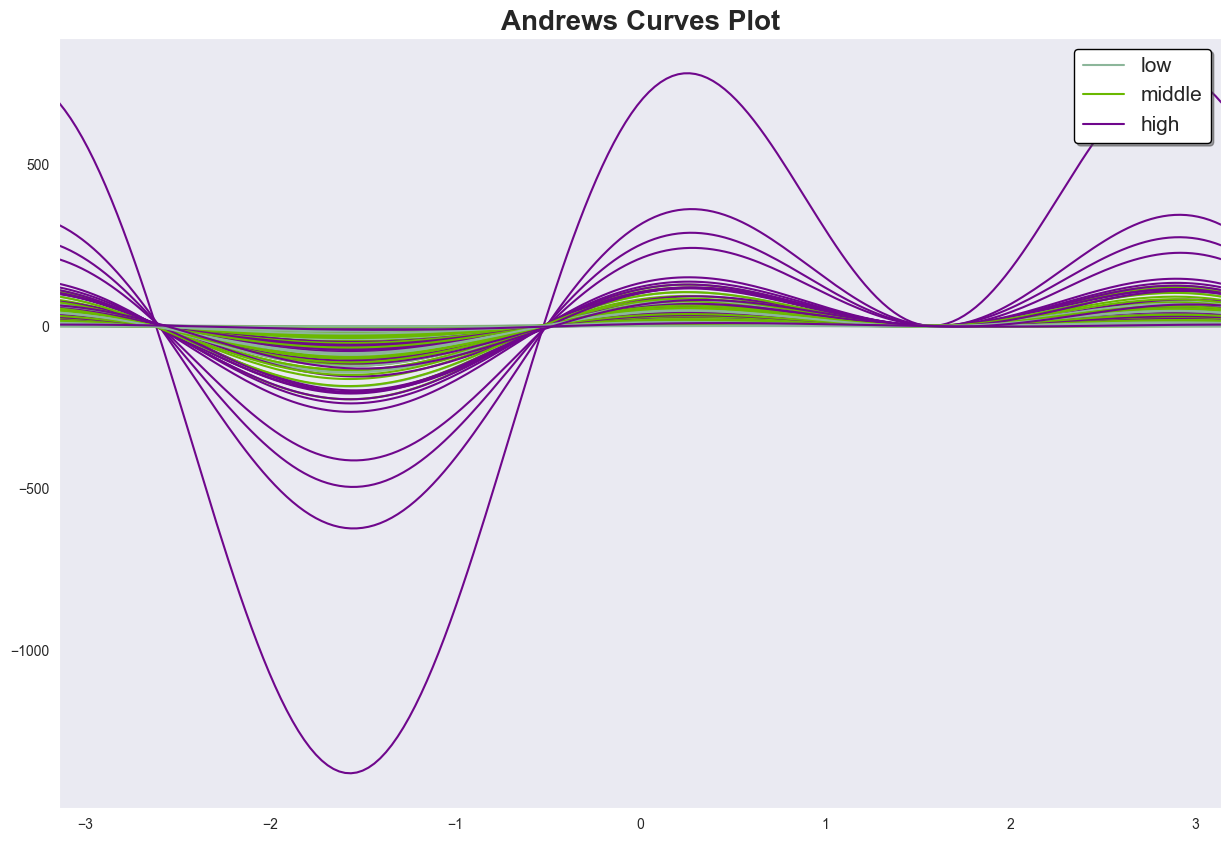

In [59]:
plt.figure(figsize=(15, 10))
andrews_curves(dataset, 'Toxicity')
plt.title('Andrews Curves Plot', fontsize=20, fontweight='bold')
plt.legend(loc=1, prop={'size': 15}, frameon=True, shadow=True, facecolor='white', edgecolor='black')
plt.show()

<Figure size 640x480 with 0 Axes>

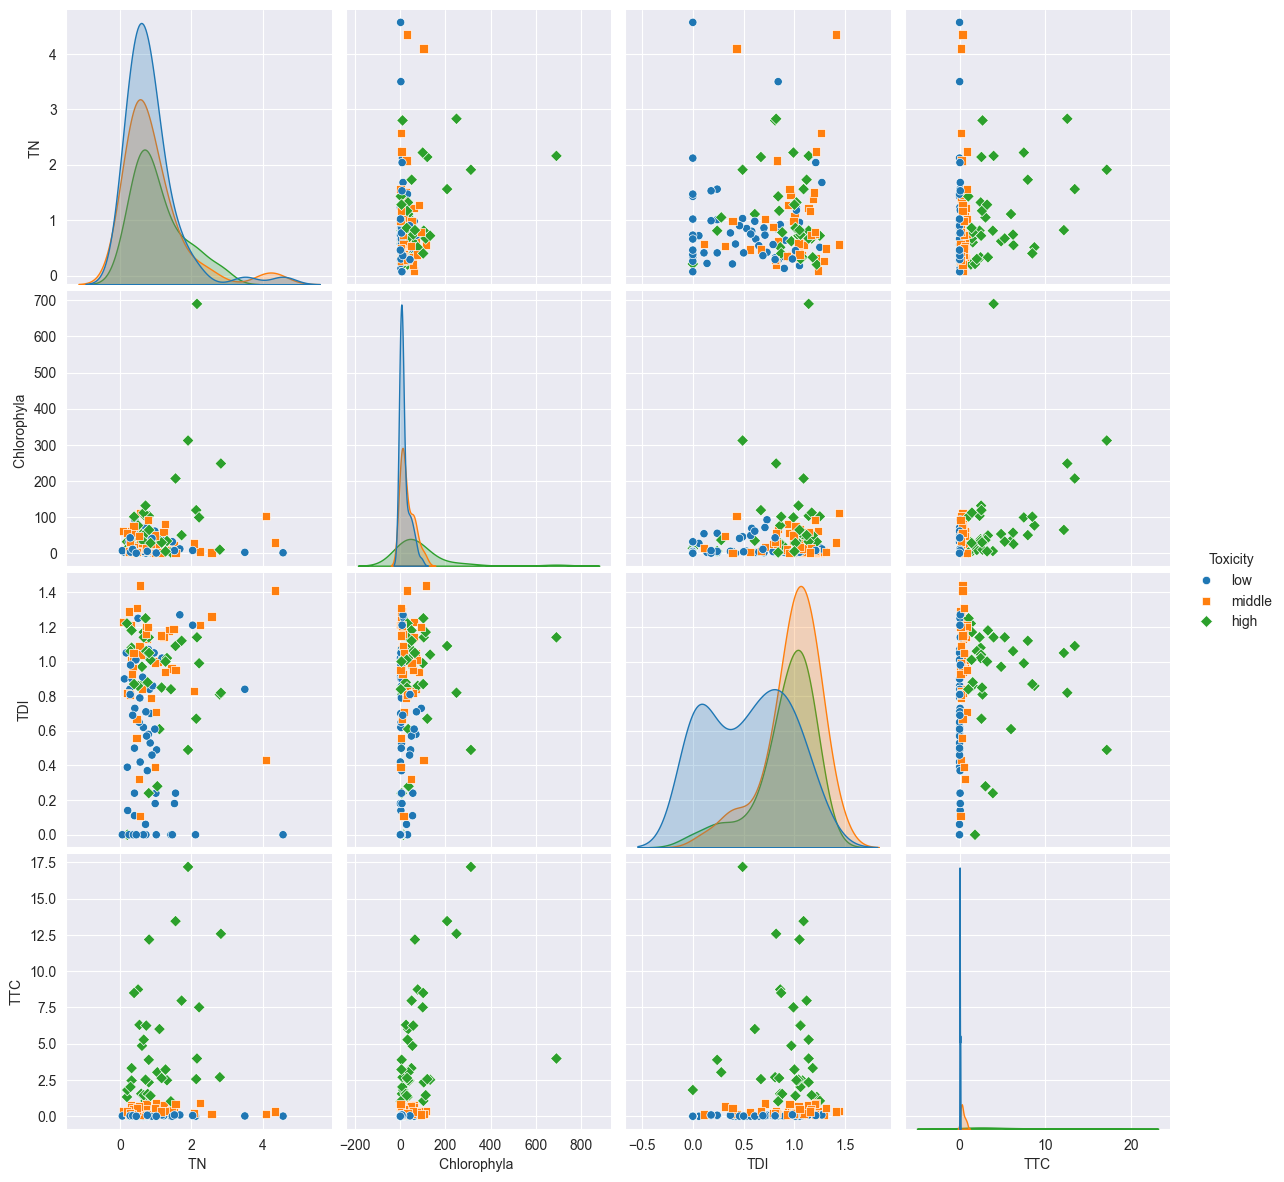

In [60]:
plt.figure()
sns.pairplot(dataset, hue='Toxicity', height=3, markers=['o', 's', 'D'])
plt.show()

<Figure size 640x480 with 0 Axes>

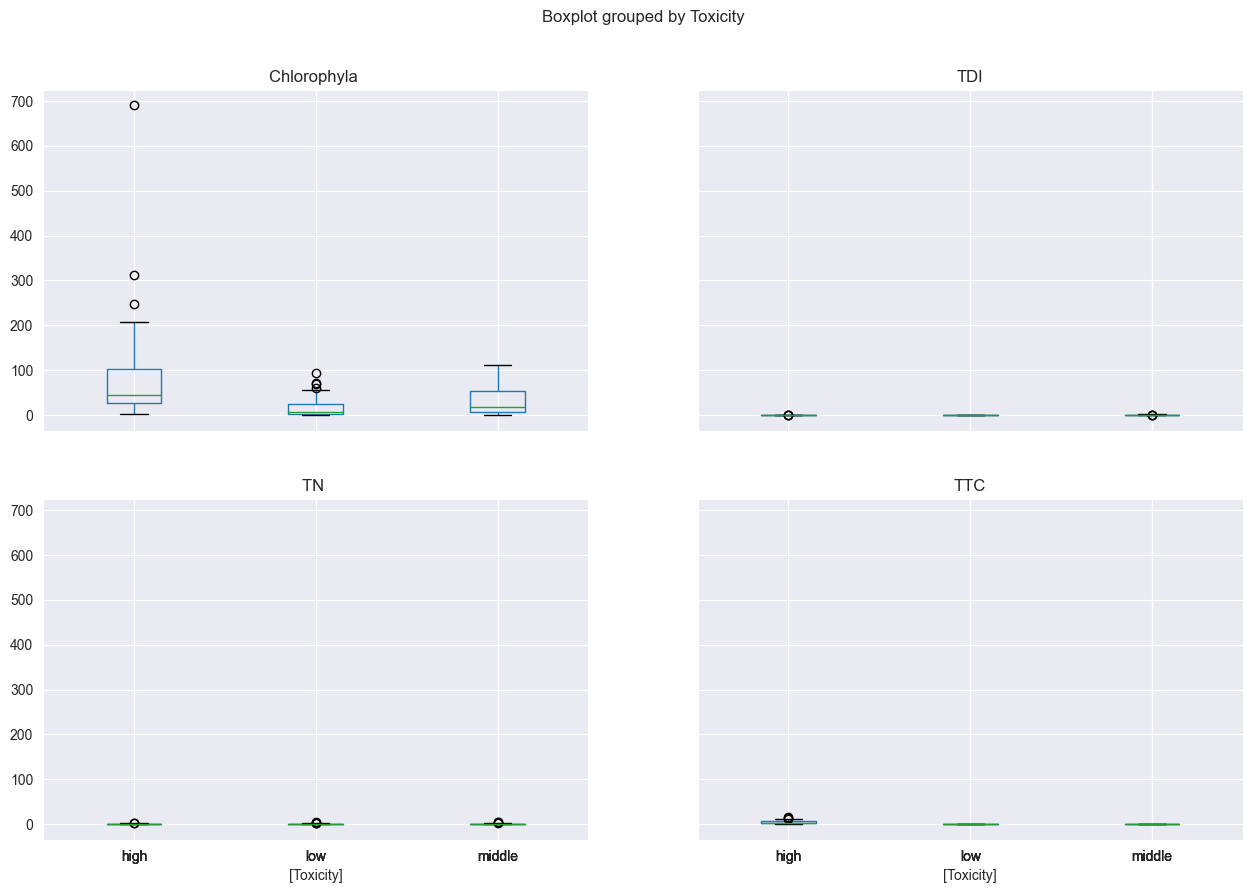

In [61]:
plt.figure()
dataset.boxplot(by='Toxicity', figsize=(15, 10))
plt.show()

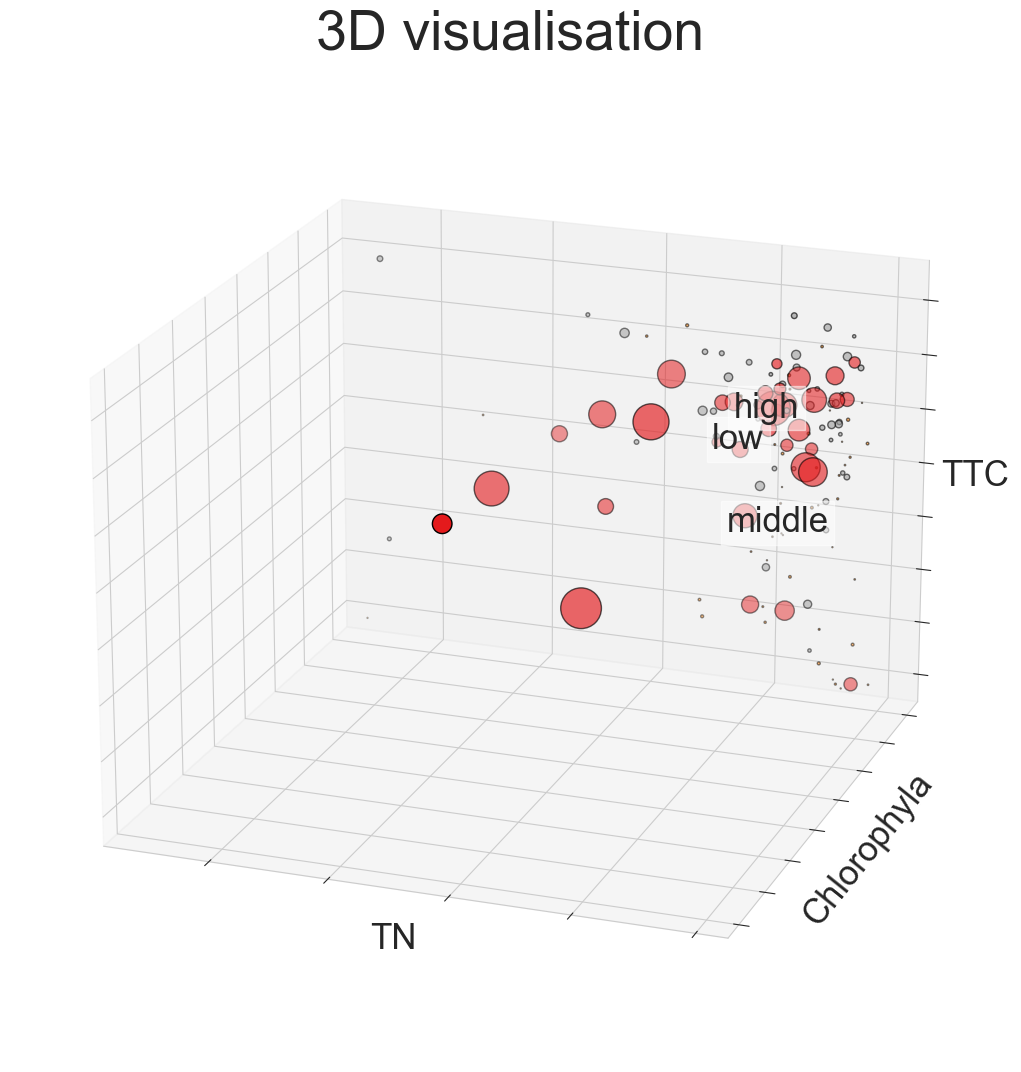

In [69]:
fig = plt.figure(1, figsize=(18, 13))
ax = fig.add_subplot(projection='3d')
ax.view_init(elev=20, azim=110)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k', s=X[:, 3]*50)

for name, label in [('low', 0), ('middle', 1), ('high', 2)]:
    ax.text3D(
        X[y == label, 0].mean(),
        X[y == label, 1].mean(),
        X[y == label, 2].mean(),
        name,
        horizontalalignment='center',
        bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),
        size=25,
    )

ax.set_title('3D visualisation', fontsize=40)
ax.set_xlabel('TN', fontsize=25)
ax.xaxis.set_ticklabels([])
ax.set_ylabel('Chlorophyla', fontsize=25)
ax.yaxis.set_ticklabels([])
ax.set_zlabel('TTC', fontsize=25)
ax.zaxis.set_ticklabels([])

plt.show()

In [63]:
classifier = KNeighborsClassifier(n_neighbors=3)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
classifier.fit(X_train, y_train)
y_pred = classifier.predict(X_test)

In [64]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[4, 0, 2],
       [3, 9, 0],
       [2, 6, 2]], dtype=int64)

In [65]:
accuracy = accuracy_score(y_test, y_pred)*100
print('Accuracy of our model is equal ' + str(round(accuracy, 2)) + ' %.')

Accuracy of our model is equal 53.57 %.


In [66]:
k_list = list(range(1, 50, 2))
cv_scores = []

for k in k_list:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=10, scoring='accuracy')
    cv_scores.append(scores.mean())

<Figure size 640x480 with 0 Axes>

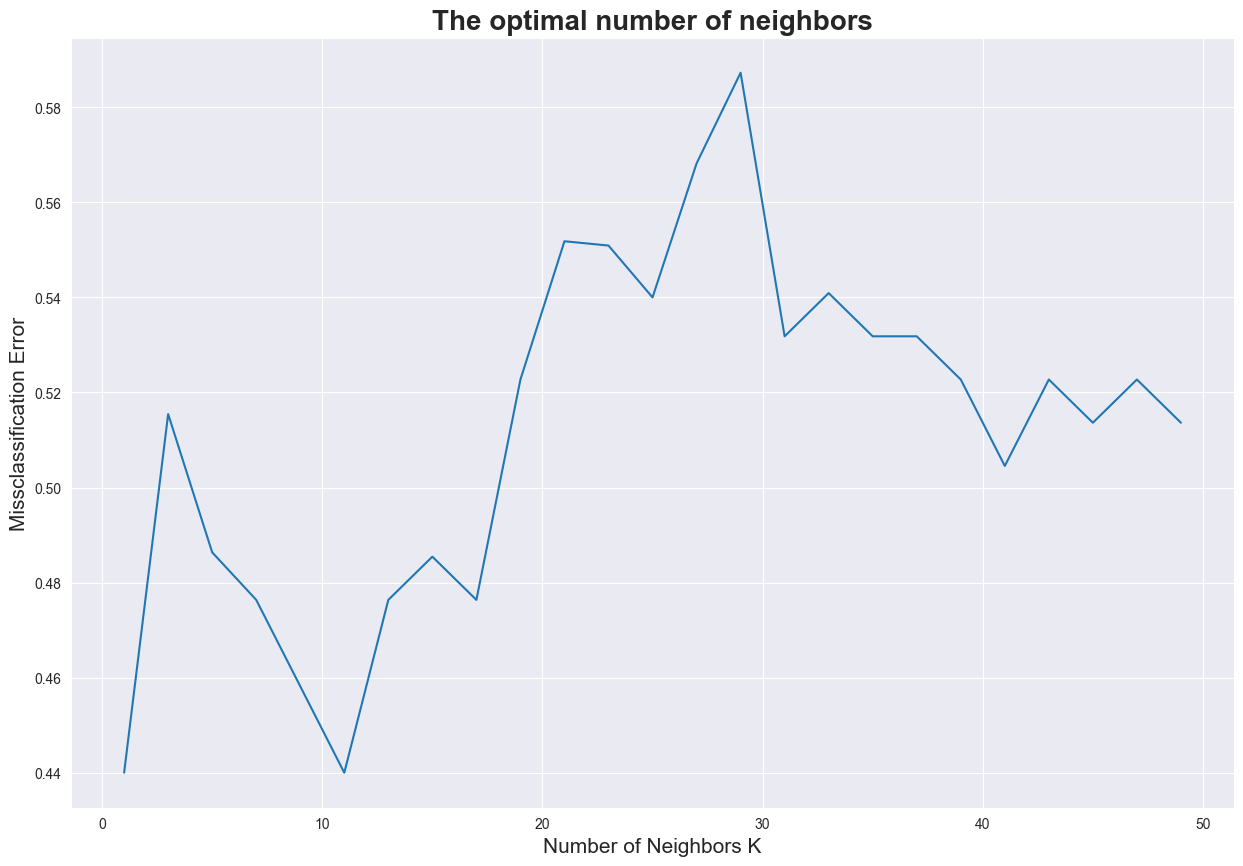

In [67]:
MSE = [1-x for x in cv_scores]

plt.figure()
plt.figure(figsize=(15, 10))
plt.title('The optimal number of neighbors', fontsize=20, fontweight='bold')
plt.xlabel('Number of Neighbors K', fontsize=15)
plt.ylabel('Missclassification Error', fontsize=15)
sns.set_style('whitegrid')
plt.plot(k_list, MSE)

plt.show()

In [68]:
best_k = k_list[MSE.index(min(MSE))]
print(f'The optimal number of neighbors is {best_k}')

The optimal number of neighbors is 1
